In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_dep = pd.read_csv('departamentos-nuevo.csv', dtype="string")
df_casa = pd.read_csv('casas-act.csv', dtype="string")

def convertir(precios):
    lista=[]
    for i in precios:          
        if i[0]=='U':               
            dato=i
            i=i.replace("USD ","")
            a=float(i)                        
            a=round(a*20.58,1)
            a=int(a)
            a=str(a)                           
            lista.append(a)
        else:
            lista.append(i)
    return lista

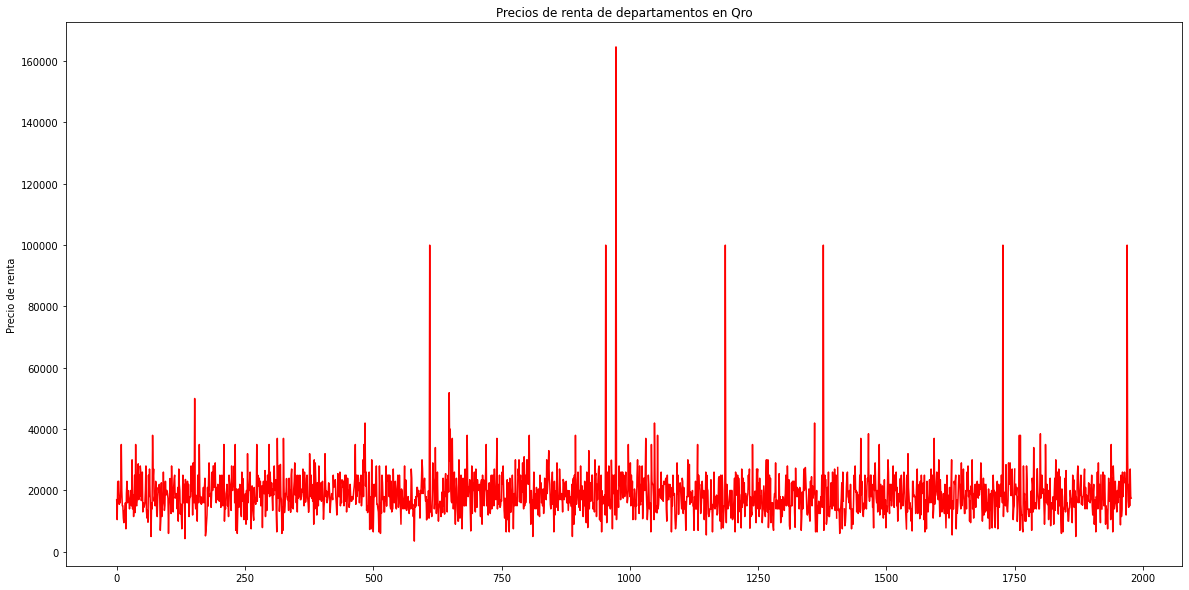

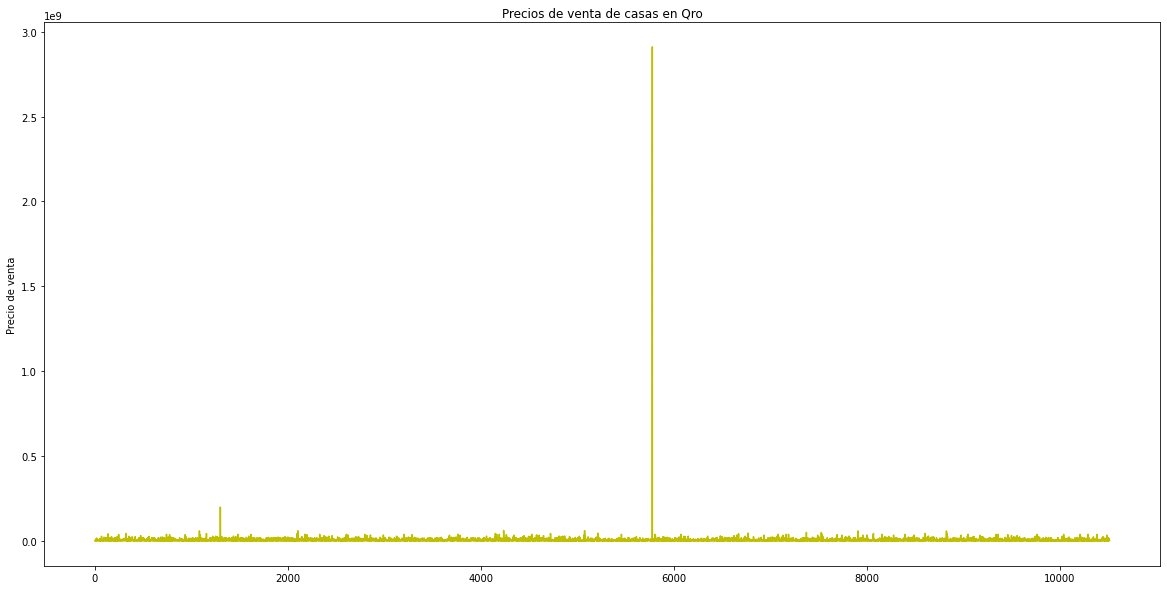

In [4]:
df_dep['nprecio']=df_dep['precio'].str.replace("MN ", "", regex=True).str.replace("$","",regex=False).str.replace(",","",regex=False)
df_dep['nprecio']=convertir(df_dep['nprecio'])
df_dep['nprecio']=pd.to_numeric(df_dep["nprecio"], errors="coerce")
df_dep['nprecio']=df_dep['nprecio'].replace(0,np.NaN)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.plot(df_dep['nprecio'],'r-')
plt.ylabel('Precio de renta')
plt.title("Precios de renta de departamentos en Qro")

df_casa['nprecio']=df_casa['precio'].str.replace("MN ", "", regex=True).str.replace("$","",regex=True).str.replace(",","",regex=True)
df_casa['nprecio']=convertir(df_casa['nprecio'])
df_casa['nprecio']=pd.to_numeric(df_casa["nprecio"], errors="coerce")
df_casa['nprecio']=df_casa['nprecio'].replace(0,np.NaN)
lista=list(df_casa['nprecio'])
lista=sorted(lista)
#print(lista)
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(20)
plt.plot(df_casa['nprecio'],'y-')
plt.ylabel('Precio de venta')
plt.title("Precios de venta de casas en Qro")

plt.show()